In [1]:
include("./param.jl");
include("./aux_functions.jl");

using Main.aux_functions
using Main.param
using ADCME
using SparseArrays

using DelimitedFiles
using Dates
using Plots


2021-06-03 11:50:21.475371: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library cudart64_100.dll


In [2]:
maxiter = 100
N_steps = 3
print("maximum iteration: ",maxiter,"\t","Number of steps: ",N_steps,"\n")
param_model_val = param_model(N_steps=N_steps);
tf_variables, h_t, q_t_x, q_t_y = Darcy_flow_solver(param_model_val);

maximum iteration: 100	Number of steps: 3


In [3]:
loss,dw_2, opt_ADAM, opt_LFGS, opt_ADAM_sum, opt_LFGS_sum, diff_eval,p_pre_soft_max, p = Info_upscale(tf_variables,param_model_val,q_t_x, q_t_y,maxiter)

sess = Session(); init(sess);


global N_k_dis_ = 4
global T_exp = -2
T_=  10.0 .^ -T_exp

# save_values(sess,param_model_val,tf_variables,q_t_x, q_t_y,p,"w")

print_status(sess,loss,diff_eval,T_exp,T_,N_k_dis_,tf_variables)
ScipyOptimizerMinimize(sess, opt_LFGS_sum,feed_dict = Dict(tf_variables.lambda => ones(1)*T_,tf_variables.N_k_dis=>64))
# BFGS!(sess,dw_2*1e5,options=Dict("maxiter"=> maxiter, "ftol"=>1e-12, "gtol"=>1e-12),feed_dict = Dict(tf_variables.lambda => ones(1)*T_,tf_variables.N_k_dis=>64))
print("first bfgs")
# save_values(sess,param_model_val,tf_variables,q_t_x, q_t_y,p,"a")
print_status(sess,loss,diff_eval,T_exp,T_,N_k_dis_,tf_variables)

check_diff = run(sess,diff_eval,feed_dict = Dict(tf_variables.lambda => ones(1)*T_,tf_variables.N_k_dis=>N_k_dis_))

T_exp_final =4


2.830469177224561e-511:50-2	100.0	0.0008898404151956539	5.519987298352926		4C:\Users\dbeli\.julia\adcme\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\dbeli\.julia\adcme\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\dbeli\.julia\adcme\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\dbeli\.julia\adcme

4

In [4]:
momment2, y_x_list, y_y_list = load_QoIs(param_model_val);

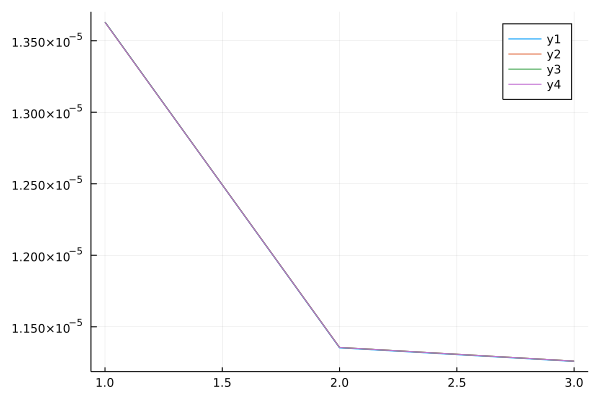

In [5]:
plot(mean(y_x_list[5],dims=1)[1,:])

q_check = run(sess,q_t_x)[5];
p_check = run(sess,p);
plot!(sum(q_check .* p_check,dims=2)[:,1,1])
plot!(maximum(q_check,dims=2)[:,1,1])
plot!(minimum(q_check,dims=2)[:,1,1])

In [8]:



while T_exp <= 4

    plot!(sum(q_check .* p_check,dims=2)[:,1,1])
    # plot!(maximum(q_check,dims=2)[:,1,1])
    # plot!(minimum(q_check,dims=2)[:,1,1])

    global T_=  10.0 ^ (-T_exp) 

    print_status(sess,loss,diff_eval,T_exp,T_,N_k_dis_,tf_variables)
    check_diff_ = run(sess,diff_eval,feed_dict = Dict(tf_variables.lambda => ones(1)*T_,tf_variables.N_k_dis=>N_k_dis_))  
    print_status(sess,loss,diff_eval,T_exp,T_,N_k_dis_,tf_variables)
    print("pre BFGS")
    ScipyOptimizerMinimize(sess, opt_LFGS,feed_dict = Dict(tf_variables.lambda => ones(1)*T_,tf_variables.N_k_dis=>N_k_dis_))
    # BFGS!(sess,loss*1e5,options=Dict("maxiter"=> 20, "ftol"=>1e-12, "gtol"=>1e-8),feed_dict = Dict(tf_variables.lambda => ones(1)*T_,tf_variables.N_k_dis=>N_k_dis_))
    print("post BFGS")
    print_status(sess,loss,diff_eval,T_exp,T_,N_k_dis_,tf_variables)
    if round(T_exp,digits=2)%1 == 0

        # save_values(sess,param_model_val,tf_variables,q_t_x, q_t_y,p)
        check_diff_ = run(sess,diff_eval,feed_dict = Dict(tf_variables.lambda => ones(1)*T_,tf_variables.N_k_dis=>N_k_dis_))  
        global N_k_dis_ = update_K_p(sess,param_model_val,tf_variables,check_diff_,N_k_dis_,p_pre_soft_max)

        q_check = run(sess,q_t_x)[5];
        p_check = run(sess,p);
        plot!(sum(q_check .* p_check,dims=2)[:,1,1])
        # plot!(maximum(q_check,dims=2)[:,1,1])
        # plot!(minimum(q_check,dims=2)[:,1,1])

    end


    global T_exp += 0.5

    
end

11:530.5	0.31622776601683794	0.006467050240372774	4.060765659653333		8
11:530.5	0.31622776601683794	0.006467050240372774	4.060765659653333		8
pre BFGSpost BFGS11:540.5	0.31622776601683794	0.014810223252178126	3.3214207517498853		8
11:541.0	0.1	0.014810223252178126	5.048921383391047		8
11:541.0	0.1	0.014810223252178126	5.048921383391047		8
pre BFGSpost BFGS11:541.0	0.1	0.12021096963355	4.81521797705309		8
function for update K:0.12021096963355	8
11:541.5	0.03162277660168379	0.0029606439661637772	8.127258328515165		16
11:541.5	0.03162277660168379	0.0029606439661637772	8.127258328515165		16
pre BFGSpost BFGS11:541.5	0.03162277660168379	0.04869913692986775	5.653826508385048		16
11:542.0	0.01	0.04869913692986775	8.144133459832258		16
11:542.0	0.01	0.04869913692986775	8.144133459832258		16
pre BFGSpost BFGS11:542.0	0.01	0.054664068202828736	8.097600030092739		16
function for update K:0.054664068202828736	16
11:542.5	0.0031622776601683794	0.0016810655293632462	14.912117873657026		32
11:542.5	

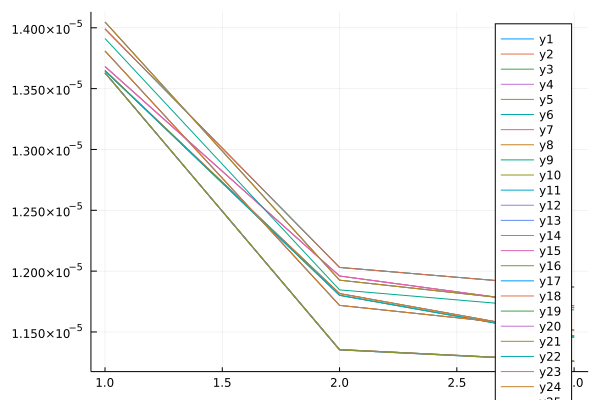

In [9]:
plot!(mean(y_x_list[5],dims=1)[1,:])
